# Final Project 4 - Modeling Performance

The Lending Club's dataset originally contained 74 columns. After inspecting the relevance of each feature in predicting loan performance, more than half the columns were discarded. The types of columns discarded fell into a category of being either "applicant identifier, categorical" or "processed/decisioned application features". Examples of the first irrelevant category were "member ID", "State", or "reasons seeking a loan" columns, to name a few. The latter group were columns that were already decisioned by Lending Club, i.e. "interest rates", "loan amounts", and "grade" of the loan - all features that already include correlated features of ultimate loan performance.

The current dataset only contains columns that include prior credit history, ultimately a credit profile of each applicant to include in our learning models in helping to determine any predictive capabilities pre-funding a loan.

### Importing packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [329]:
lend = pd.read_csv('/Users/dennisvasquez/Downloads/lending-club-loan-data/loan.csv', 
                   usecols=[
'loan_amnt',
'grade',
'home_ownership',
'annual_inc',
'loan_status',
'dti',
'emp_length',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'revol_bal',
'revol_util',
'total_acc',
'mths_since_last_major_derog',
'acc_now_delinq',
'tot_cur_bal',
'open_acc_6m',
'open_il_6m',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'inq_fi',
'total_cu_tl',
'inq_last_12m'
], low_memory=False);

lend.sample(5)

,loan_amnt,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
320709,4800.0,F,2 years,RENT,59000.0,Charged Off,33.89,0.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,34000.0,NaN,NaN,NaN
471256,20000.0,A,10+ years,OWN,83918.0,Issued,20.88,2.0,0.0,15.0,...,20449.0,45.9,2.0,2.0,6889.0,59.4,26600.0,0.0,7.0,0.0
326906,19800.0,C,8 years,MORTGAGE,82923.0,Current,19.54,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39000.0,NaN,NaN,NaN
834424,21000.0,A,7 years,MORTGAGE,83000.0,Current,24.87,0.0,0.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,30400.0,NaN,NaN,NaN
823776,9300.0,A,1 year,RENT,42000.0,Current,15.69,1.0,0.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,11800.0,NaN,NaN,NaN


In [330]:
# 887,379 ; 34
lend.shape

(887379, 34)

In [4]:
# START #

lend = lend.iloc[480000:]

In [5]:
lend.shape

(407379, 34)

In [ ]:
bot = lend.dropna(subset=['open_il_6m'])
bot.shape

In [ ]:
#466295 #df.iloc[1:2]
lend.total_cu_tl.iloc[466294]

In [ ]:
# df[df['deaths'] > 50]

lend[lend['total_cu_tl'] >= 1];

In [ ]:
lend[lend['il_util'] >= 5];

In [ ]:
lend = lend.dropna(thresh=20)
lend.sample(10);

In [ ]:

dti = g2g
emp_length = g2g
delinq_2yrs = g2g
inq_last_6mths = g2g
mths_since_last_delinq = half, 400K are good and nan
mths_since_last_record = only 130k are good
open_acc = g2g
pub_rec = g2g
revol_bal = g2g
revol_util = good to go
total_acc = good to go, only 29 are NaN
mths_since_last_major_derog = about 220k good
acc_now_delinq = '' very weird says only 29 are NaN, 800+ are 0??
tot_cur_bal = YES MIMP FOR 70K
open_acc_6m = ''
open_il_6m = ''
open_il_12m = ''
open_il_24m = '' same
mths_since_rcnt_il = ''
total_bal_il = ''
il_util = '' about 18k
open_rv_12m = ''
open_rv_24m = ''
max_bal_bc = ''same
all_util = '' same
total_rev_hi_lim = YES, M.IMP keep
inq_fi = '' same
total_cu_tl = '' same
inq_last_12m = leave out, cant guess on 800k loans, STILL BAD AT 400K

In [ ]:
# keep
#lend.inq_last_12m = lend.inq_last_12m.replace('-4', 4)

In [ ]:

### keep ###

lend.open_il_24m.isnull().value_counts()

In [ ]:
# keep
lend.inq_last_12m.value_counts()

In [ ]:
# keep
lend.pub_rec.unique()

In [ ]:
lend.pub_rec.describe()

In [ ]:
lend.inq_last_6mths.drop(lend.index[[]], inplace=True)

In [ ]:
plt.hist(lend.revol_bal, alpha=.3);

In [ ]:
sns.boxplot(lend.dti);

In [ ]:
# Number of rows by columns
lend.shape

In [ ]:
# $13,093,511,950 Total loan portfolio, includes loans from 2007 - 2015
print(sum(lend.loan_amnt))

## Cleaning the dataset

### Making a dummy variable for the 'home_ownership' field

In [331]:
# Create dummy variables of the grade column
lend['grade_ord'] = lend.grade.map({'A': 7,
                                    'B': 6,
                                    'C': 5,
                                    'D': 4,
                                    'E': 3,
                                    'F': 2,
                                    'G': 1})

lend = lend.drop('grade', axis=1);

In [332]:
lend.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [333]:
lend.home_ownership.value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

In [334]:
# Deleting the 'OTHER', 'NONE', and 'ANY' home ownership columns to reduce noise in data since they're smaller amounts
lend = lend[lend.home_ownership != 'OTHER']
lend = lend[lend.home_ownership != 'NONE']
lend = lend[lend.home_ownership != 'ANY']

In [335]:
# Calling the get_dummies function then adding the new dummy columns into the dataset
lend_reside = pd.get_dummies(lend['home_ownership'],prefix='home',drop_first=False)
lend = pd.concat([lend, lend_reside], axis=1)
lend = lend.drop('home_ownership', axis=1);

In [336]:
lend.sample(5)

,loan_amnt,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,grade_ord,home_MORTGAGE,home_OWN,home_RENT
3401,7500.0,3 years,40000.0,Fully Paid,1.44,1.0,0.0,12.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6,0,0,1
351452,2000.0,1 year,100000.0,Fully Paid,1.89,0.0,3.0,73.0,NaN,15.0,...,NaN,NaN,18700.0,NaN,NaN,NaN,6,0,0,1
326437,7000.0,9 years,48000.0,Current,31.93,1.0,0.0,2.0,NaN,20.0,...,NaN,NaN,20100.0,NaN,NaN,NaN,4,0,0,1
343981,23450.0,3 years,62000.0,Current,21.29,0.0,3.0,43.0,NaN,10.0,...,NaN,NaN,19200.0,NaN,NaN,NaN,5,0,1,0
65717,1000.0,3 years,35000.0,Current,25.94,0.0,0.0,NaN,NaN,7.0,...,NaN,NaN,22800.0,NaN,NaN,NaN,6,0,0,1


### Cleaning the "emp_length" column

In [337]:
# Truncating and converting the 'emp_lenght' or employment length column into a float variable
lend.loc[:, 'emp_length'] = lend['emp_length'].str.split('years').apply(lambda x: x[0])
lend.loc[:, 'emp_length'] = lend['emp_length'].str.split('year').apply(lambda x: x[0])
lend.emp_length = lend.emp_length.replace('< 1 ', 1)
lend.emp_length = lend.emp_length.replace('10+ ', 10)
lend = lend[lend.emp_length != 'n/a']
lend['emp_length'] = lend['emp_length'].astype(int)

### Cleaning the "loan_status" column
#### The "loan_status" field is the dependent variable or y column that we will try to predict

In [338]:
# Display frequency table of all the loan status
lend.loan_status.value_counts()

Current                                                568679
Fully Paid                                             200203
Charged Off                                             42690
Late (31-120 days)                                      10872
Issued                                                   7829
In Grace Period                                          6015
Late (16-30 days)                                        2215
Does not meet the credit policy. Status:Fully Paid       1938
Default                                                  1148
Does not meet the credit policy. Status:Charged Off       734
Name: loan_status, dtype: int64

In [339]:
# Delete 'Current' and 'Issued' status, as it is not indicative in determing the FINAL performance status of the loan
# Note the reduction in rows
lend = lend[lend.loan_status != 'Current']
lend = lend[lend.loan_status != 'Issued']
lend.shape

(265815, 36)

In [340]:
# Create binary dummy variables of the loan status column into a new column, "status_group"
# Bad performing loans: 1, paid in full loans: 0
lend['status_group'] = lend.loan_status.map({'Fully Paid': 0,
                                             'Charged Off': 1, 
                                             'Late (31-120 days)': 1,
                                             'In Grace Period': 1,
                                             'Late (16-30 days)': 1,
                                             'Does not meet the credit policy. Status:Fully Paid': 0,
                                             'Default': 1,
                                             'Does not meet the credit policy. Status:Charged Off': 1})

#lend[['loan_status','status_group']].sample(5)
lend = lend.drop('loan_status', axis=1);

### This is our overall base rate that we will compare our learning model scores against:

In [341]:
# 0.314997947 or 0.685002053 split of fully paid to bad performing loans 
# 68.5% of the dataset are loans paid in full
lend.status_group.value_counts()

0    202141
1     63674
Name: status_group, dtype: int64

In [342]:
# Modified dataset sample
lend.sample(5)

,loan_amnt,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,grade_ord,home_MORTGAGE,home_OWN,home_RENT,status_group
299575,10000.0,4,50000.0,14.89,0.0,0.0,NaN,NaN,20.0,0.0,...,NaN,16600.0,NaN,NaN,NaN,7,1,0,0,0
254087,6200.0,3,46000.0,21.53,0.0,0.0,NaN,NaN,22.0,0.0,...,NaN,105600.0,NaN,NaN,NaN,7,0,0,1,0
83220,12750.0,2,91000.0,10.18,0.0,2.0,NaN,NaN,14.0,0.0,...,NaN,27400.0,NaN,NaN,NaN,5,1,0,0,0
109796,28200.0,9,127000.0,1.81,0.0,0.0,NaN,100.0,5.0,1.0,...,NaN,16200.0,NaN,NaN,NaN,5,0,0,1,0
168079,30000.0,1,140000.0,11.29,1.0,1.0,12.0,NaN,6.0,0.0,...,NaN,6500.0,NaN,NaN,NaN,5,1,0,0,0


## Cleaning specific fields of outliers

### Cleaning the "annual_inc" column of typo values

In [343]:
# mean impute values for all NaNs in the total_rev_hi_lim column
lend.total_rev_hi_lim.fillna(lend.total_rev_hi_lim.mean(), inplace=True)

In [344]:
lend.tot_cur_bal.fillna(lend.tot_cur_bal.mean(), inplace=True)

In [345]:
lend.mths_since_last_major_derog.fillna(lend.tot_cur_bal.mean(), inplace=True)

In [346]:
lend.annual_inc.describe()

count    2.658150e+05
mean     7.350731e+04
std      6.143433e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.830000e+04
max      8.900060e+06
Name: annual_inc, dtype: float64

In [347]:
# Shows the last 10 outliers greater than $3MM in the annual income field
lend.annual_inc.sort_values().tail(10)

714064    2146496.0
29708     3900000.0
306811    4900000.0
180080    5000000.0
30176     6000000.0
675609    6000000.0
169235    6100000.0
177182    7141778.0
866973    8706582.0
684000    8900060.0
Name: annual_inc, dtype: float64

In [348]:
# Keeps all values <= 3,000,000 in the "annual income" column, deletes any rows > 3,000,000
lend = lend[lend['annual_inc'] <= 3000000]

### Cleaning the "inq_last_12m" column of typo values

In [349]:
# Fixing typo for inq_last_12m field
lend.inq_last_12m.value_counts()
lend.inq_last_12m = lend.inq_last_12m.replace('-4', 4)

### Cleaning the "revol_util" column of typo values

In [350]:
# Revolving account credit utilization rate column
# Shows inaccurate typo values greater than 100 (i.e. 829., 366., 153., etc.)
# Instead of correcting and dividing these rows by 10, I simply delete them from the set
lend.revol_util.describe()

count    265567.000000
mean         54.767811
std          24.752243
min           0.000000
25%          36.800000
50%          56.300000
75%          74.300000
max         892.300000
Name: revol_util, dtype: float64

In [351]:
# Shows which and how many innacurate or typo values are present, shown as greater than 100
rev = lend[(lend.revol_util > 100)].revol_util.unique()
rev

array([ 106.4,  101.8,  104.3,  104.2,  108.8,  106.1,  106.2,  100.5,
        101.4,  103.9,  102.8,  100.7,  105.2,  106.5,  103.1,  100.6,
        102.7,  103.2,  101.5,  119. ,  103.5,  105.3,  105.7,  104.5,
        100.4,  103.6,  102. ,  105.8,  103.3,  100.9,  100.1,  100.2,
        107.7,  101.1,  101.2,  101.3,  104.1,  101. ,  112.9,  100.8,
        106.9,  103.7,  101.6,  109.9,  102.5,  102.4,  100.3,  102.2,
        104.4,  128.1,  101.9,  127.6,  120.2,  109.1,  101.7,  102.6,
        105.1,  102.3,  115.3,  102.1,  122.5,  112.7,  103.4,  103.8,
        107. ,  104.9,  110.3,  107.3,  103. ,  129.5,  112.5,  118.9,
        107.2,  114.9,  109.7,  129.4,  105.5,  112.1,  130.2,  111. ,
        113.4,  106.3,  146.1,  108.2,  106.6,  108.3,  127.4,  123.2,
        107.8,  113.1,  109.3,  108.4,  104.6,  109.5,  366.6,  115.1,
        105.4,  111.4,  148. ,  150.7,  892.3,  109.8,  153. ,  110.1,
        110.6,  108.9,  112.2,  111.3,  113. ,  105.9,  141.8,  110. ,
      

In [352]:
# Keeps all values <= 100 in the "revol_util" column, deletes any rows > 100
lend = lend[lend['revol_util'] <= 100]

### Replacing NaN values in the dataset

In [353]:
lend = lend.drop('open_acc_6m', axis=1)
lend = lend.drop('open_il_6m', axis=1)
lend = lend.drop('open_il_12m', axis=1)
lend = lend.drop('open_il_24m', axis=1)
lend = lend.drop('mths_since_rcnt_il', axis=1)
lend = lend.drop('total_bal_il', axis=1)
lend = lend.drop('open_rv_12m', axis=1)
lend = lend.drop('open_rv_24m', axis=1)
lend = lend.drop('max_bal_bc', axis=1)
lend = lend.drop('all_util', axis=1)
lend = lend.drop('inq_fi', axis=1)
lend = lend.drop('total_cu_tl', axis=1)
lend = lend.drop('inq_last_12m', axis=1)
lend = lend.drop('il_util', axis=1);

In [354]:
# Replacing all 'NaN' fields with '0' throughout the entire dataset
lend = lend.replace('NaN', 0)

In [355]:
lend.status_group.value_counts()

0    201536
1     63289
Name: status_group, dtype: int64

## Visualizing the features and their correlations

In [ ]:
# Displaying boxplots of binary loan status (0 = good loan perfomance vs 1 = bad) against dti (debt-to-income ratios) 
sns.boxplot(x='status_group', y='dti',data = lend, palette="Set2");

In [ ]:
# Displaying boxplots of binary loan status against revol_util (revolving utilization rate) 
sns.boxplot(x='status_group', y='revol_util', data = lend, palette="Set2");

In [ ]:
correl = pd.DataFrame(corr);

In [ ]:
#rev = lend[(lend.revol_util > 100)].revol_util.unique()

rell = correl >.65
rell = pd.DataFrame(rell);

In [ ]:
rell

In [ ]:
# Correlation matrix
corr = lend.corr()
corr

In [ ]:
sns.lmplot('open_acc_6m', 'inq_last_12m', data=lend, fit_reg=True,palette="Set1");

In [ ]:
sns.lmplot('all_util', 'il_util', data=lend, fit_reg=True, palette="Set2");

In [ ]:
lend.hist(column=['dti','emp_length','grade','loan_amnt','mths_since_last_delinq',
                  'open_acc','revol_util','total_acc','pub_rec','total_rev_hi_lim'],figsize = (12,8));

In [ ]:
# Correlation matrix heatmap of columns
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 7))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

In [ ]:
# Covariance matrix heatmap of columns
cov = lend.cov()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(cov, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 7))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(cov, mask=mask, cmap=cmap, vmax=1,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

## Applying the Learning Models

### Logistic Regression Model

In [ ]:
'loan_amnt',                   
'emp_length',                     
'annual_inc',                     
'dti',                  
'delinq_2yrs',               
'inq_last_6mths',       
'mths_since_last_delinq',       
'mths_since_last_record',        
'open_acc',                      
'pub_rec',                    
'revol_bal',                   
'revol_util',                   
'total_acc',  
'mths_since_last_major_derog',    
'acc_now_delinq',                 
'tot_cur_bal',                  
'open_acc_6m',                  
'open_il_6m',                  
'open_il_12m',                  
'open_il_24m',           
'mths_since_rcnt_il',             
'total_bal_il',                   
'il_util',                  
'open_rv_12m',                  
'open_rv_24m',                  
'max_bal_bc',                    
'all_util',             
'total_rev_hi_lim',               
'inq_fi',                  
'total_cu_tl',                 
'inq_last_12m',                   
'grade_ord',                  
'home_MORTGAGE',                    
'home_OWN',                       
'home_RENT'

In [309]:
lend.columns

Index([u'loan_amnt', u'emp_length', u'annual_inc', u'dti', u'delinq_2yrs',
       u'inq_last_6mths', u'mths_since_last_delinq', u'mths_since_last_record',
       u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
       u'mths_since_last_major_derog', u'acc_now_delinq', u'tot_cur_bal',
       u'total_rev_hi_lim', u'grade_ord', u'home_MORTGAGE', u'home_OWN',
       u'home_RENT', u'status_group'],
      dtype='object')

In [356]:
# assigning the independent and dependent variables. 

features = [ u'annual_inc', u'dti', u'delinq_2yrs',
       u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
     u'acc_now_delinq', u'tot_cur_bal',
       u'total_rev_hi_lim', u'grade_ord']
X = lend[features]
y = lend.status_group

In [357]:
# Split data into train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [312]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
# transform our training features
X_train_scale = scale.fit_transform(X_train)

# transform the testing features in the same way
X_test_scale = scale.transform(X_test)

In [404]:
# Calling the logistic regression model function
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l1', C=20)

In [405]:
# Fitting the data to the logistic regression model
logreg.fit(X_train, y_train)

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [406]:
# features and corresponding coefficients
coef = pd.DataFrame({'coefficients': logreg.coef_[0],'features': X.columns,})
coef

,coefficients,features
0,-1.321597e-06,annual_inc
1,3.146292e-02,dti
2,1.225632e-06,revol_bal
3,2.508056e-03,revol_util
4,-9.111629e-07,tot_cur_bal
5,-1.397216e-06,total_rev_hi_lim
6,-4.006468e-01,grade_ord


In [407]:
coef.coefficients.sort_values(ascending=False)

1    3.146292e-02
3    2.508056e-03
2    1.225632e-06
4   -9.111629e-07
0   -1.321597e-06
5   -1.397216e-06
6   -4.006468e-01
Name: coefficients, dtype: float64

In [408]:
# Make accuracy predictions on test set
y_pred_class = logreg.predict(X_test)

In [318]:
# The accuracy or predicted class divided by the test class
#from sklearn import metrics

#print metrics.accuracy_score(y_test, y_pred_class)

In [416]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=5)
print('CV Accuracy {}, Average Accuracy {}'.format(scores, scores.mean()))

CV Accuracy [ 0.76250802  0.75689606  0.77211366  0.76006797  0.76144173], Average Accuracy 0.762605490168


In [409]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_class)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[49247  1332]
 [14221  1407]]


* TP: 173 = we predicted yes they are defaults (will perform bad), and they were actual defaults (performed bad).
* TN: 49,977 = we predicted no they're not defaults (will perform good), and they were not defaults (performed good).
* FP: 196 = we predicted yes they are defaults (will perform bad), but they were not actual defaults (performed good) (Type I error).
* FN: 15,920 = we predicted no they're not defaults (will perform good), and they were defaults (they performed bad) (Type II error).

**Specificity**: When it's actually not a default, how often does it predict a non-default?
(fraction of loans that were actually good, but predicted as bad loans)
**Recall or Sensitivity**: When it's actually a default, how often does it predict a default?

**Precision**: When it predicts a default, how often is it correct?

**F1 Score** = 2*((precision * sensitivity)/(precision + sensitivity))

In [410]:
from sklearn.metrics import recall_score
# Sensitivity or Recall (we can idenfity most of the defaults out there) (how good we are about identifying them)
print(recall_score(y_test, y_pred_class))

0.0900307141029


In [411]:
from sklearn.metrics import precision_score
# Precision (how often we're usually right about identifying the defaults)
print(precision_score(y_test, y_pred_class))

0.513691128149


In [412]:
from sklearn.metrics import f1_score
# F1 Score
print(f1_score(y_test, y_pred_class))

0.153209560625


In [413]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class, target_names=["non-default", "default"]))

             precision    recall  f1-score   support

non-default       0.78      0.97      0.86     50579
    default       0.51      0.09      0.15     15628

avg / total       0.71      0.77      0.70     66207



In [414]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:37])
print('Pred:', y_pred_class[0:37])

True: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [415]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn.metrics import roc_auc_score
logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("AUC for Logistic Regression: {:.3f}".format(logreg_auc))

AUC for Logistic Regression: 0.685


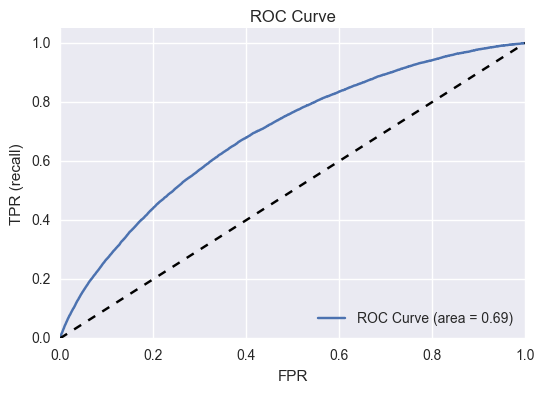

In [370]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % logreg_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

### Random Forest Model

In [ ]:
5	total_acc	0.098052
2	open_acc	0.077884
11	grade_ord	0.070905
7	home_RENT	0.007890
8	home_MORTGAGE	0.007650
9	home_OWN

In [371]:
# assigning the independent and dependent variables. 

features = ['annual_inc', u'dti', u'revol_bal', u'revol_util',
    'tot_cur_bal',
       u'total_rev_hi_lim', u'grade_ord']
X = lend[features]
y = lend.status_group

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [373]:
from sklearn.ensemble import RandomForestClassifier
    
rf = RandomForestClassifier(n_estimators = 150, max_features='sqrt')
    
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [374]:
features = X.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
1,dti,0.185348
2,revol_bal,0.170536
3,revol_util,0.166758
0,annual_inc,0.142573
4,tot_cur_bal,0.140594
5,total_rev_hi_lim,0.123904
6,grade_ord,0.070287


In [375]:
y_pred_rf_class = rf.predict(X_test)

In [ ]:
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(rf, X, y, scoring='accuracy')
#print('CV Accuracy {}, Average Accuracy {}'.format(scores, scores.mean()))

#for n_trees in range(1, 100, 25):
    #model = RandomForestClassifier(n_estimators = n_trees)
    #scores = cross_val_score(model, X, y, scoring='accuracy')
    #print('n trees: {}, CV accuracy {}, Average accuracy {}'.format(n_trees, scores, scores.mean()))

In [376]:
confusion = confusion_matrix(y_test, y_pred_rf_class)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[48203  2376]
 [13666  1962]]


In [377]:
print(classification_report(y_test, y_pred_rf_class, target_names=["non-default", "default"]))

             precision    recall  f1-score   support

non-default       0.78      0.95      0.86     50579
    default       0.45      0.13      0.20     15628

avg / total       0.70      0.76      0.70     66207



In [378]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print("AUC for Random Forests: {:.3f}".format(rf_auc))

AUC for Random Forests: 0.665


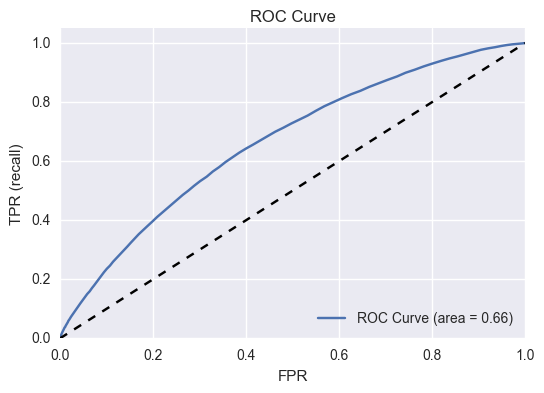

In [379]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [139]:
lend.shape

(264825, 22)

In [140]:
X_train.shape

(198618, 9)

In [141]:
X_test.shape

(66207, 9)

In [154]:
X.sample(50)

,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_cur_bal,home_RENT,home_MORTGAGE,home_OWN,total_rev_hi_lim,grade_ord
741760,60000.00,15.10,23.0,15742.0,66.4,66.0,28418.000000,1,0,0,23800.000000,5
368818,65000.00,19.57,21.0,14434.0,26.4,50.0,36249.000000,0,0,1,54600.000000,2
850419,15000.00,34.16,7.0,3601.0,27.3,9.0,11320.000000,1,0,0,13200.000000,5
387043,57000.00,21.71,14.0,12541.0,51.0,17.0,132669.000000,0,0,1,24600.000000,2
308058,50000.00,2.50,4.0,3947.0,62.7,6.0,262972.000000,0,1,0,6300.000000,1
265842,38000.00,19.60,13.0,3420.0,17.2,37.0,18151.000000,1,0,0,19900.000000,2
459329,122000.00,15.58,18.0,6862.0,23.9,33.0,291099.000000,0,1,0,28700.000000,1
106651,42000.00,19.86,9.0,6448.0,37.9,27.0,31326.000000,1,0,0,17000.000000,2
223963,26046.97,11.66,4.0,9036.0,80.7,6.0,138840.067835,1,0,0,29557.496541,1
828108,50000.00,30.10,19.0,28248.0,39.6,37.0,70974.000000,0,1,0,71300.000000,3
